In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [33]:
CSV_PATH = "/workspace/plane-nerf/outputs/jackal_floor_training_data_1/plane-nerf-fast/2024-03-13_105236/eval_results_2024-03-13_123535.csv"

In [34]:
#Open CSV file as 2d numpy array
csv_data = np.genfromtxt(CSV_PATH, delimiter=',')
#If nan values are present, replace them with 0
csv_data = np.nan_to_num(csv_data)
iteration = csv_data[:, 0::3]
translation = csv_data[:, 1::3]
rotation = csv_data[:, 2::3]


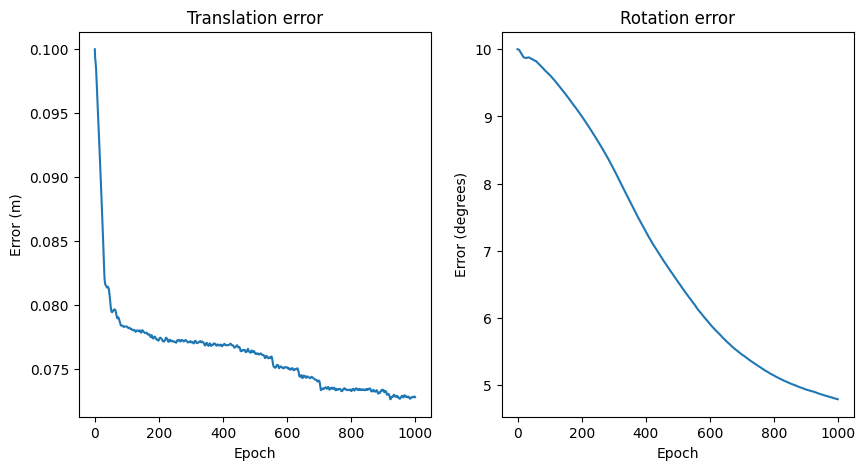

In [35]:
#Plot mean of translation and rotation error separately

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(translation.mean(axis=0))
plt.title("Translation error")
plt.xlabel("Epoch")
plt.ylabel("Error (m)")

plt.subplot(1, 2, 2)
plt.plot(rotation.mean(axis=0) * 180 / math.pi)
plt.title("Rotation error")
plt.xlabel("Epoch")
plt.ylabel("Error (degrees)")

plt.show()

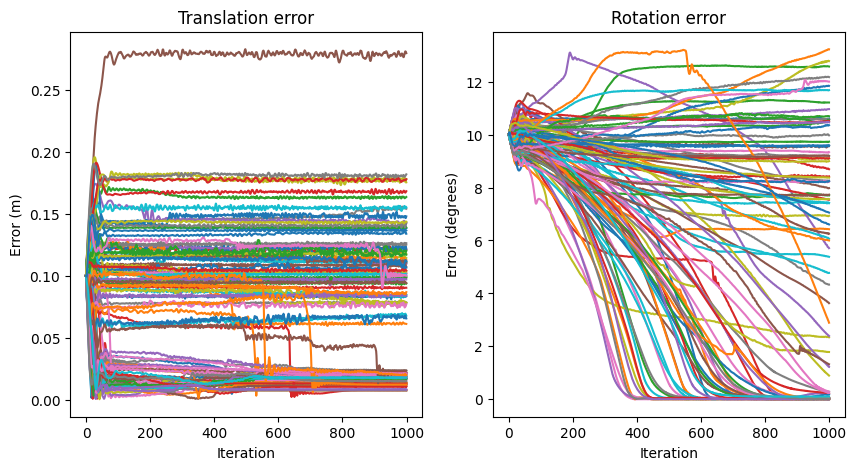

In [36]:
#Plot mean of translation and rotation error of a specific arrays of rows
row = [i for i in range(len(csv_data))]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(translation[row].T)
plt.title("Translation error")
plt.xlabel("Iteration")
plt.ylabel("Error (m)")

plt.subplot(1, 2, 2)
plt.plot(rotation[row].T * 180 / math.pi)
plt.title("Rotation error")
plt.xlabel("Iteration")
plt.ylabel("Error (degrees)")

plt.show()

Final translation error: 0.07275785274599712 m
Final rotation error: 4.7937574506975755 degrees
Standard deviation of final translation error: 0.05798815097276066 m
Standard deviation of final rotation error: 4.5797878212100915 degrees


Text(0, 0.5, 'Frequency')

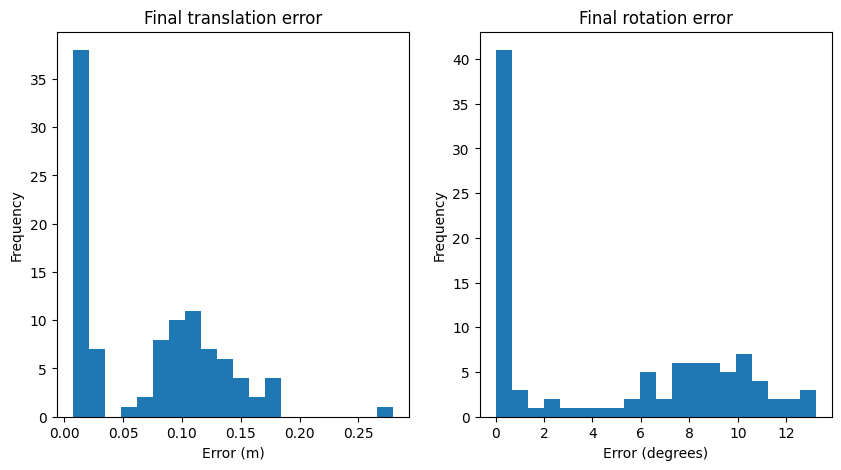

In [37]:
final_translation_error = translation[:,-1]
final_rotation_error = rotation[:,-1]
print(f"Final translation error: {final_translation_error.mean()} m")
print(f"Final rotation error: {final_rotation_error.mean() * 180 / math.pi} degrees")

#Find standard deviation of final translation and rotation error
print(f"Standard deviation of final translation error: {final_translation_error.std()} m")
print(f"Standard deviation of final rotation error: {final_rotation_error.std() * 180 / math.pi} degrees")

#Plot histogram of final translation and rotation error
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(final_translation_error, bins=20)
plt.title("Final translation error")
plt.xlabel("Error (m)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(final_rotation_error * 180 / math.pi, bins=20)
plt.title("Final rotation error")
plt.xlabel("Error (degrees)")
plt.ylabel("Frequency")

Text(0.5, 0, 'Iteration')

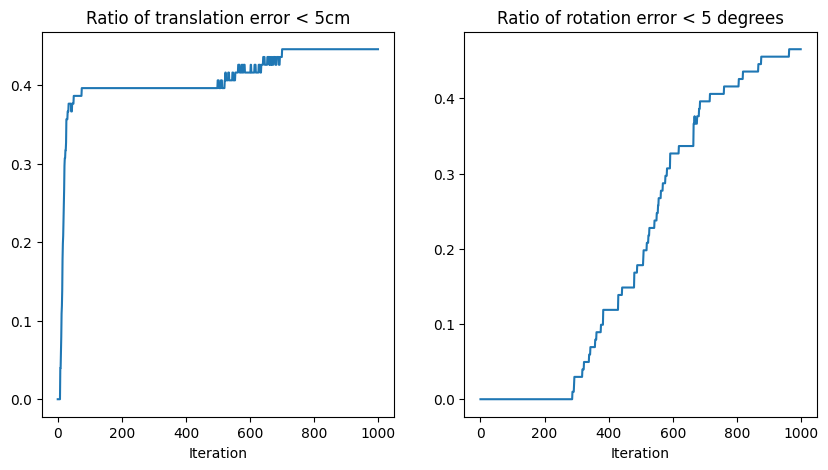

In [38]:
#Draw ratio that falls below 5 cm 5 degrees against iteration
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot((translation < 0.05).mean(axis=0))
plt.title("Ratio of translation error < 5cm")
plt.xlabel("Iteration")

plt.subplot(1, 2, 2)
plt.plot(((rotation < 0.05).mean(axis=0)))
plt.title("Ratio of rotation error < 5 degrees")
plt.xlabel("Iteration")


In [39]:
#Find index of the worst performing model
worst_translation_index = np.argmax(final_translation_error)
worst_rotation_index = np.argmax(final_rotation_error)

print(f"Worst performing model for translation error: {worst_translation_index}")
print(f"Worst performing model for rotation error: {worst_rotation_index}")

Worst performing model for translation error: 5
Worst performing model for rotation error: 71
